# 🌌 CNNs y TensorFlow: Descifrando el Lenguaje de las Señales de Tráfico 🚦

## 🎼 Introducción: La magia detrás de lo visual 🧠👁️

Si alguna vez te has preguntado cómo nuestras mentes decodifican de manera eficiente un mundo lleno de imágenes y patrones, no estás solo. Las Redes Neuronales Convolucionales (CNNs) emergen inspiradas en este misterio cerebral, focalizadas en replicar nuestra habilidad para reconocer patrones visuales. Y en esta travesía, TensorFlow, el niño prodigio de Google Brain, ha sido el aliado perfecto para llevar estas redes al siguiente nivel. 🌠

## 🚀 Nuestro Viaje: Del Pixel a la Percepción 🎯

En el corazón de la Universidad del Valle de Guatemala, estudiantes apasionados por la ciencia de datos se sumergen en un laboratorio único. Su misión: utilizar CNNs a través de TensorFlow para descifrar y clasificar las señales de tráfico, una habilidad esencial en el mundo emergente de la navegación y vehículos autónomos. 🚗

### 🗂️ El Terreno de Juego: Nuestro Dataset 🌐

Con 43 variedades de señales y un océano de imágenes por categoría, nos enfrentamos a un desafío de diversidad. La clave está en entrenar a nuestra CNN para que no solo reconozca una señal, sino que la identifique bajo lluvia, sol, día, noche y desde múltiples ángulos.

## 🛠️ Las Piezas del Rompecabezas: Arquitectura de las CNNs 🌀

1. **C (Capa de Convolución)** 🖌️: Es el ojo agudo que escudriña cada pixel, detectando rasgos como bordes y texturas.
  
2. **S (Capa de Sub-muestreo o Pooling)** 🔍: Piénsalo como un editor que simplifica la imagen, conservando solo lo esencial.
  
3. **F (Capa Totalmente Conectada)** 🔗: Es el cerebro detrás de la operación, conectando todos los datos y tomando la decisión final.

## 🎶 La Bella Sinergia de las CNNs 🎵

Como una orquesta 🎻 que crea música celestial a partir de la colaboración de distintos instrumentos, las CNNs funcionan en perfecta armonía. Cada capa tiene un propósito, y juntas, crean una imagen clara de nuestro mundo.

---

📝 **Autores del Laboratorio**: Alejandro Gomez 20347 y Gabriel Vicente 20498  
📅 **Fecha de Creación**: 19 de agosto de 2023  
📚 **Referencias Principales**:
- [TensorFlow Official](link)
- [Convolutional Networks for Images, Speech, and Time-Series by LeCun & Bengio](link)
- [Deep Learning by Goodfellow, Bengio, & Courville, 2016](link)



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import *

In [3]:
import pickle

def load_data(file_path):
    with open(file_path, mode='rb') as f:
        data = pickle.load(f)
    return data['features'], data['labels']

# AGREGAR RUTAS
file_paths = {
    'training': "entrenamiento.p",
    'testing': "prueba.p",
    'validation': "validacion.p"
}

training_data = load_data(file_paths['training'])
testing_data = load_data(file_paths['testing'])
validation_data = load_data(file_paths['validation'])

X_training, y_training = training_data
X_testing, y_testing = testing_data
X_validation, y_validation = validation_data


In [21]:
from tabulate import tabulate

# Calcular la cantidad de imágenes en cada conjunto de datos
num_samples = [
    ("Conjunto de entrenamiento", X_training.shape[0]),
    ("Conjunto de prueba", X_testing.shape[0]),
    ("Conjunto de validación", X_validation.shape[0])
]

# Mostrar la cantidad de imágenes en forma de tabla
table_headers = ["Conjunto de datos", "Número de imágenes"]
table = tabulate(num_samples, headers=table_headers, tablefmt="pretty")
print(table)


+---------------------------+--------------------+
|     Conjunto de datos     | Número de imágenes |
+---------------------------+--------------------+
| Conjunto de entrenamiento |       34799        |
|    Conjunto de prueba     |       12630        |
|  Conjunto de validación   |        4410        |
+---------------------------+--------------------+


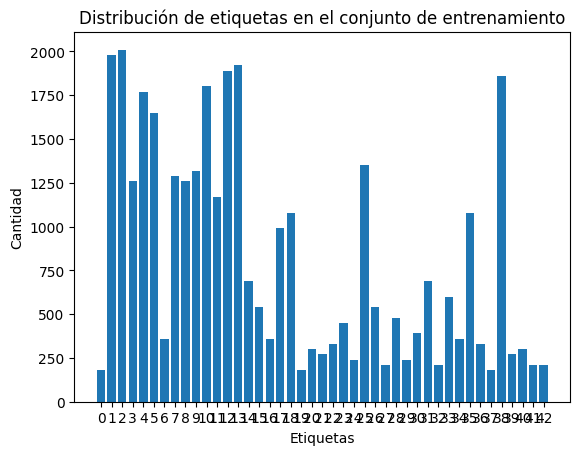

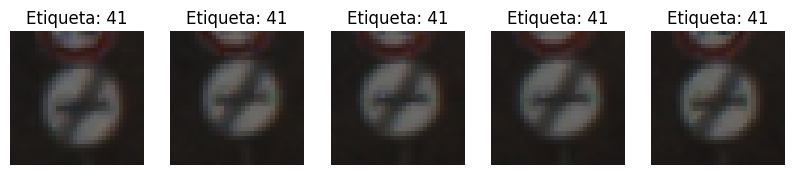

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizar la distribución de etiquetas/clases en el conjunto de entrenamiento
unique_labels, label_counts = np.unique(y_training, return_counts=True)
plt.bar(unique_labels, label_counts)
plt.xlabel('Etiquetas')
plt.ylabel('Cantidad')
plt.title('Distribución de etiquetas en el conjunto de entrenamiento')
plt.xticks(unique_labels)
plt.show()

# Mostrar algunas imágenes de ejemplo del conjunto de entrenamiento
num_example_images = 5
plt.figure(figsize=(10, 5))
for i in range(num_example_images):
    plt.subplot(1, num_example_images, i+1)
    plt.imshow(X_training[i])
    plt.title(f'Etiqueta: {y_training[i]}')
    plt.axis('off')
plt.show()

In [6]:
# Lista de nombres de clases para usar en el gráfico
nombres_clases = [
    "Limite velocidad (20km/h)", "Limite velocidad (30km/h)", "Limite velocidad (50km/h)",
    "Limite velocidad (60km/h)", "Limite velocidad (70km/h)", "Limite velocidad (80km/h)",
    "Fin de limite velocidad (80km/h)", "Limite velocidad (100km/h)", "Limite velocidad (120km/h)",
    "No rebasar", "No rebasar para vehículos mayores de 3.5 toneladas métricas",
    "Derecho-de-vía en la siguiente intersección", "Camino prioritario", "Ceda el paso",
    "Alto", "No vehículos", "Prohibido vehículos mayores de 3.5 toneladas metricas",
    "No hay entrada", "Precaución general", "Curva peligrosa a la izquierda",
    "Curva peligrosa a la derecha", "Doble curva", "Camino disparejo", "Camino resbaloso",
    "Camino se reduce a la derecha", "Trabajos adelante", "Señales de Trafico -semáforos-",
    "Cruce de peatones", "Cruce de Niños", "Cruce de bicicletas", "Cuidado hielo/nieve",
    "Cruce de animales silvestres", "Fin de todos los limites de velocidad y rebase",
    "Gire a la derecha adelante", "Gire a la izquierda adelante", "Recto solo",
    "Vaya recto o a la derecha", "Vaya recto o a la izquierda", "Manténgase a la derecha",
    "Manténgase a la izquierda", "Vuelta en U obligada", "Fin de no rebasar",
    "Fin de no rebasar para vehículos mayores de 3.5 toneladas métricas"
]

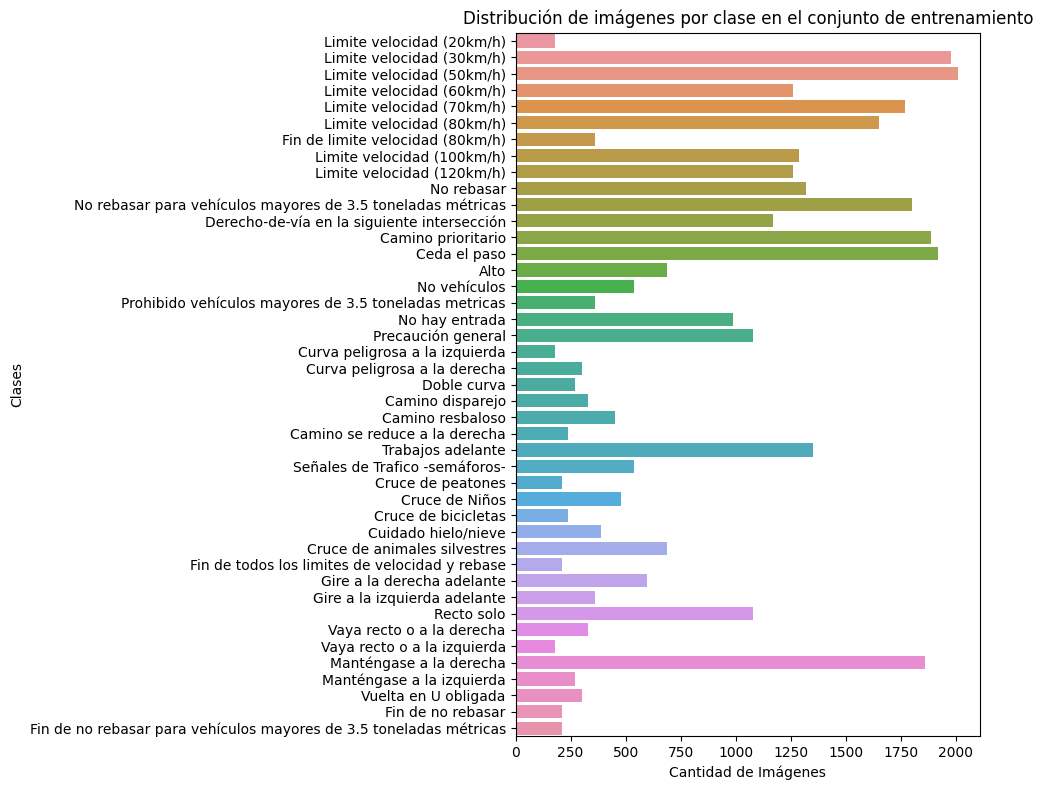

In [7]:
cantidad_por_clase = [np.sum(y_training == i) for i in range(len(nombres_clases))]

# Visualizar el histograma de clases
plt.figure(figsize=(10, 8))
sns.barplot(y=nombres_clases, x=cantidad_por_clase, orient='h')
plt.xlabel('Cantidad de Imágenes')
plt.ylabel('Clases')
plt.title('Distribución de imágenes por clase en el conjunto de entrenamiento')
plt.tight_layout()
plt.show()

C:\Users\charl\AppData\Local\Temp\ipykernel_26576\3404890514.py:15: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


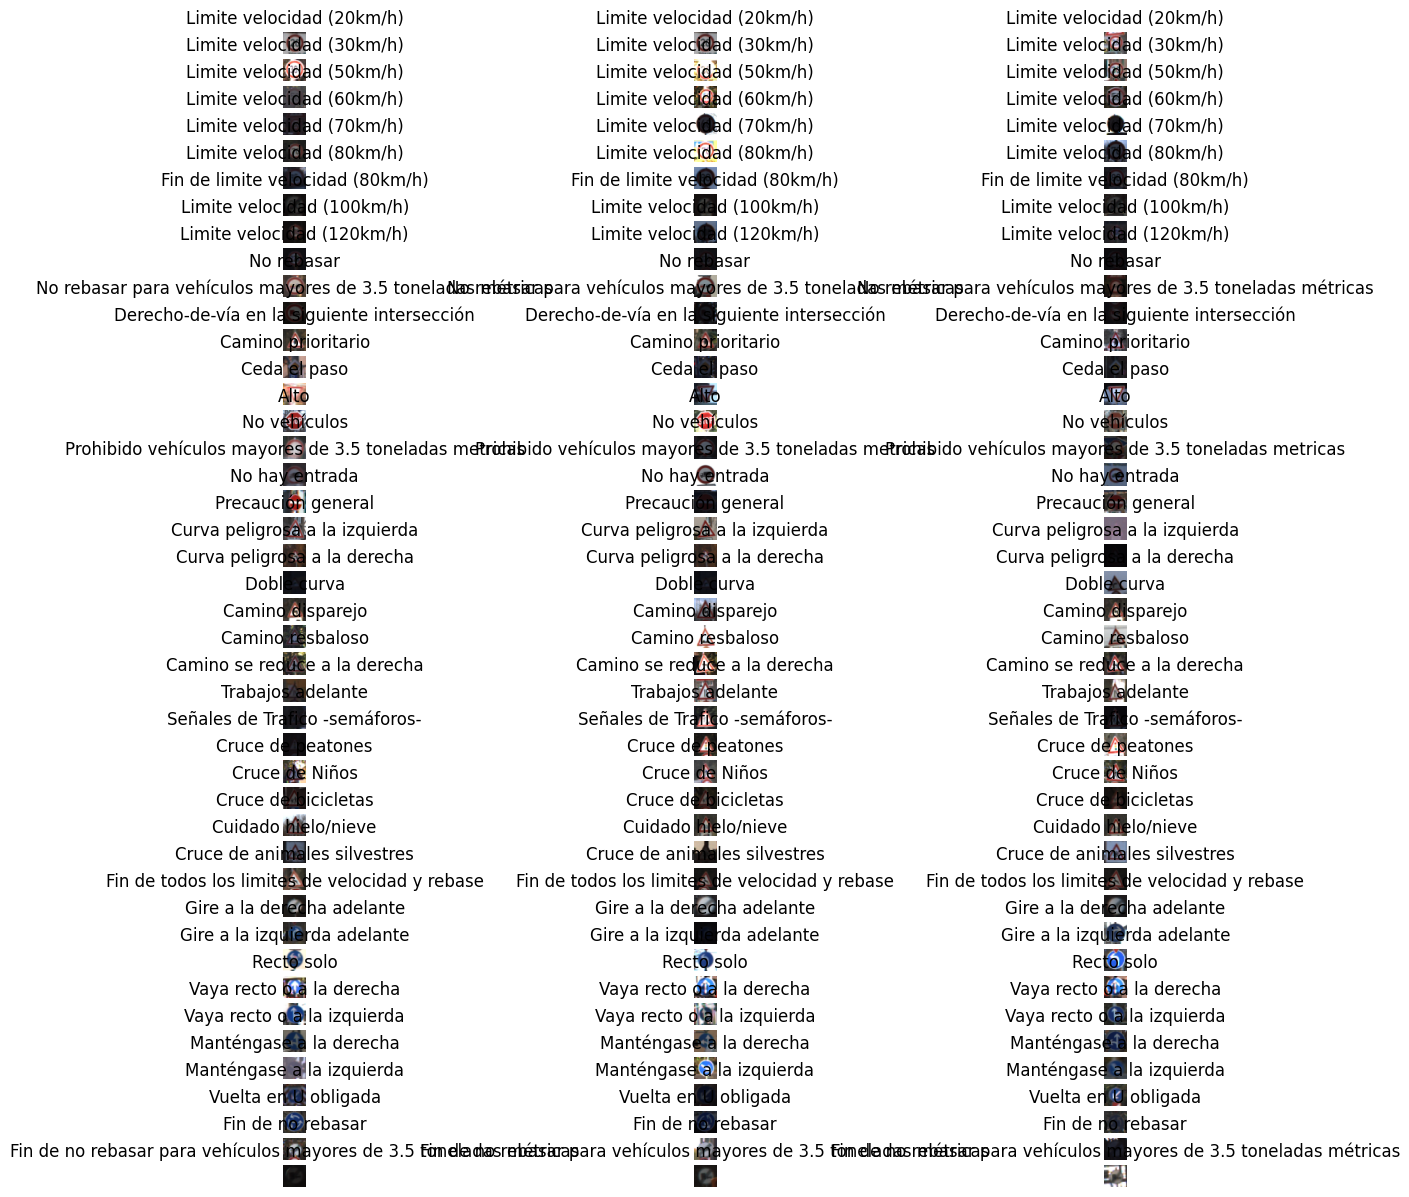

In [8]:
import random

# Número de ejemplos por clase a mostrar
ejemplos_por_clase = 3

plt.figure(figsize=(15, 15))
for i in range(len(nombres_clases)):
    idxs = np.where(y_training == i)[0]
    ejemplos_idx = random.sample(list(idxs), ejemplos_por_clase)
    for j, idx in enumerate(ejemplos_idx):
        plt.subplot(len(nombres_clases), ejemplos_por_clase, i * ejemplos_por_clase + j + 1)
        plt.imshow(X_training[idx])
        plt.title(nombres_clases[i])
        plt.axis('off')
plt.tight_layout()
plt.show()


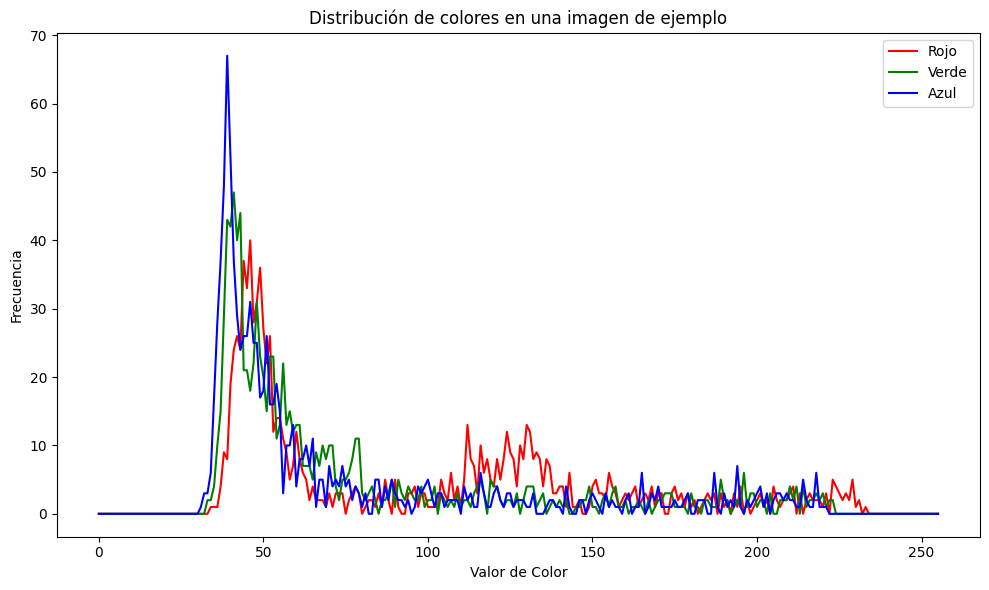

In [11]:
# Calcular histogramas de colores para un ejemplo aleatorio
ejemplo_idx = np.random.randint(0, len(X_training))
hist_red = np.histogram(X_training[ejemplo_idx][:, :, 0], bins=256, range=(0, 256))
hist_green = np.histogram(X_training[ejemplo_idx][:, :, 1], bins=256, range=(0, 256))
hist_blue = np.histogram(X_training[ejemplo_idx][:, :, 2], bins=256, range=(0, 256))

# Visualizar la distribución de colores
plt.figure(figsize=(10, 6))
plt.plot(hist_red[1][:-1], hist_red[0], color='red', label='Rojo')
plt.plot(hist_green[1][:-1], hist_green[0], color='green', label='Verde')
plt.plot(hist_blue[1][:-1], hist_blue[0], color='blue', label='Azul')
plt.xlabel('Valor de Color')
plt.ylabel('Frecuencia')
plt.title('Distribución de colores en una imagen de ejemplo')
plt.legend()
plt.tight_layout()
plt.show()


C:\Users\charl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\skimage\_shared\utils.py:316: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel, or set channel_axis.
  return func(*args, **kwargs)


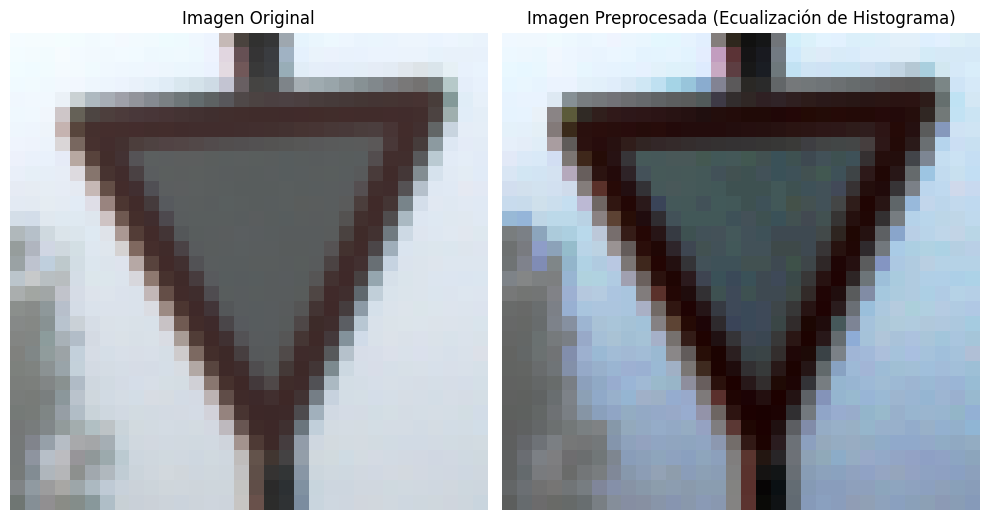

In [12]:
from skimage import exposure

# Elegir una imagen de ejemplo aleatoriamente
ejemplo_idx = np.random.randint(0, len(X_training))
imagen_original = X_training[ejemplo_idx]

# Aplicar ecualización de histograma como preprocesamiento
imagen_preprocesada = exposure.equalize_hist(imagen_original)

# Visualizar la imagen original y preprocesada
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.imshow(imagen_original)
plt.title('Imagen Original')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(imagen_preprocesada)
plt.title('Imagen Preprocesada (Ecualización de Histograma)')
plt.axis('off')
plt.tight_layout()
plt.show()


In [13]:
X_training = X_training.astype('float32') / 255.0
X_testing = X_testing.astype('float32') / 255.0
X_validation = X_validation.astype('float32') / 255.0

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_training)


desired_samples_per_class = 3000
generated_data = []

for i in range(len(nombres_clases)):
    idxs = np.where(y_training == i)[0]
    num_samples = len(idxs)
    
    if num_samples < desired_samples_per_class:
        num_generated_samples = desired_samples_per_class - num_samples
        sample_idxs = np.random.choice(idxs, num_generated_samples, replace=True)
        for idx in sample_idxs:
            generated_data.append(datagen.random_transform(X_training[idx]))

X_generated = np.array(generated_data)
y_generated = np.array([i for _ in range(len(sample_idxs))])


# Parte 2

**Construcción de la arquitectura Le-Net con TensorFlow** 🚀

- **Capa de Convolución C1** 🌀
  - **Entrada**: Imagen de 32x32x3
  - **Filtros**: 6
  - **Tamaño del Filtro**: 5x5
  - **Función de Activación**: ReLU
  
- **Capa de Pooling S2** 🌊
  - **Entrada**: 6 mapas de 28x28
  - **Tamaño del Pool**: 2x2
  - **Tipo**: Average
  
- **Capa de Convolución C3** 🌀
  - **Entrada**: 6 mapas de 14x14
  - **Filtros**: 16
  - **Tamaño del Filtro**: 5x5
  - **Función de Activación**: ReLU
  
- **Capa de Pooling S4** 🌊
  - **Entrada**: 16 mapas de 10x10
  - **Tamaño del Pool**: 2x2
  - **Tipo**: Average
  
- **Capa Completamente Conectada C5** 🔗
  - **Entrada**: 16 mapas de 5x5
  - **Neuronas**: 120
  
- **Capa Completamente Conectada F6** 🔗
  - **Entrada**: 120 neuronas
  - **Neuronas**: 84
  
- **Capa de Salida** 🎯
  - **Entrada**: 84 neuronas
  - **Neuronas**: 43 (para nuestro caso)
  - **Función de Activación**: Softmax

---

**Conceptos Claves en Redes Neuronales** 🧐

- **Convolución** 🌀: Permite extraer características importantes de una imagen a través de un filtro. Facilita que el modelo aprenda automáticamente las características sin tener que definirlas manualmente.

- **Función de Activación** 💡: Introduce no linealidades en el modelo. Las no linealidades son esenciales ya que permiten al modelo aprender de errores y ajustarse para realizar predicciones más precisas.

- **Pooling** 🌊: Se utiliza para reducir las dimensiones de los mapas de características, acelerando la computación y capturando las características más relevantes.

- **Función de Pérdida** 🎢: Es el criterio que usamos para medir cuán bien está haciendo las predicciones el modelo. Cuanto menor sea la pérdida, mejor será el modelo en hacer predicciones.

- **Optimizador** ⚙️: Es el algoritmo que ajusta los parámetros de la red para minimizar la función de pérdida. Determina la velocidad y la manera en que se actualiza el modelo en respuesta a los datos.

---



In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

def build_LeNet(input_shape, classes):
    model = Sequential()
    model.add(Conv2D(6, (5, 5), activation='relu', input_shape=input_shape))
    model.add(AveragePooling2D())
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(AveragePooling2D())
    model.add(Flatten())
    model.add(Dense(120, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(classes, activation='softmax'))

    return model

lenet = build_LeNet((32, 32, 3), 43)
lenet.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         456       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

# Diseño de la red Le-Net utilizando una herramienta de diagramación.

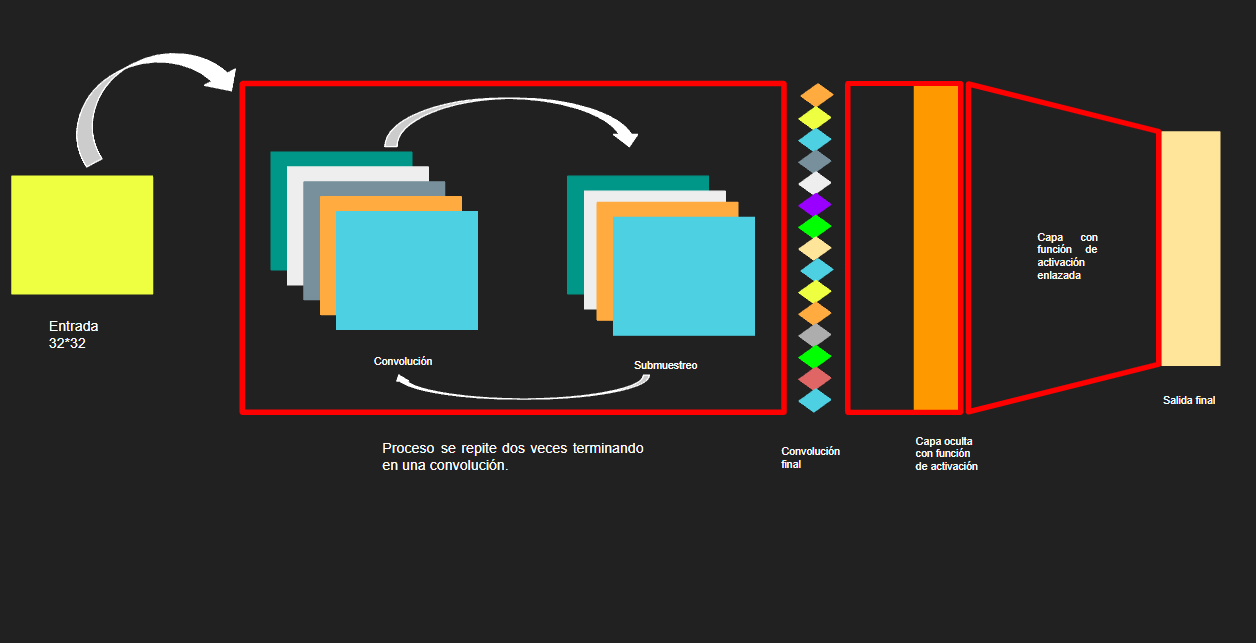

Se toma cómo referencia la https://www.researchgate.net/figure/Figura-46-La-arquitectura-LeNet-consiste-en-dos-capas-convolucionales-capas-de_fig6_329453166 para una interpretación gráfica más detallada

‌

## 🧠 Función de Pérdida (Loss Function)

La **función de pérdida**, también conocida como función de coste o error, es una parte fundamental en el aprendizaje supervisado. Esta función mide cuán bien el modelo está haciendo sus predicciones en comparación con los valores reales.

### 🎯 Objetivo:
El objetivo principal durante el entrenamiento es **minimizar** esta función de pérdida. Al hacerlo, mejoramos la precisión y la capacidad de generalización de nuestro modelo.

### 🔑 Importancia:
- **Guía el aprendizaje**: La función de pérdida nos dice cuán "equivocado" está nuestro modelo. Mediante la retropropagación, ajustamos los parámetros del modelo para reducir este error.
- **Selección de modelo**: Nos permite comparar diferentes modelos y elegir el que tenga el menor error en el conjunto de validación.
  
## 🚀 Optimizador

El **optimizador** es el algoritmo que utilizamos para actualizar los parámetros del modelo y minimizar la función de pérdida.

### 🔧 Mecanismo:
- Utiliza el gradiente de la función de pérdida con respecto a los parámetros del modelo.
- Determina en qué dirección y cuánto ajustar cada parámetro para reducir el error.

### 🔑 Importancia:
- **Convergencia rápida**: Un buen optimizador hará que el modelo converge más rápidamente a una solución óptima.
- **Evita estancamientos**: Ayuda a que el modelo no quede atrapado en mínimos locales o mesetas, especialmente en espacios de alta dimensión.
- **Ajuste automático**: Algunos optimizadores tienen tasas de aprendizaje adaptativas, lo que significa que ajustan automáticamente la tasa de aprendizaje según sea necesario.

📌 **Nota**: Es esencial elegir la función de pérdida y el optimizador adecuados según el problema específico que estás resolviendo (por ejemplo, regresión vs. clasificación).


# Parte 4

## 🏋️‍♂️ Entrenamiento de la Red Neuronal

El **entrenamiento** es el proceso mediante el cual una red neuronal ajusta sus parámetros (como los pesos y sesgos) usando un conjunto de datos de entrenamiento.

### 🔄 Proceso:
1. **Inicialización**: Antes de comenzar el entrenamiento, inicializamos los parámetros del modelo con valores pequeños y aleatorios.
2. **Feedforward**: Se ingresa un lote de ejemplos de entrenamiento en la red, y se obtienen las predicciones.
3. **Cálculo de Pérdida**: Usando la función de pérdida, comparamos las predicciones con los valores reales para obtener el error.
4. **Retropropagación**: Calculamos el gradiente de la función de pérdida respecto a cada parámetro y luego usamos el optimizador para ajustar los parámetros en una dirección que reduzca el error.
5. **Repetir**: El proceso se repite para múltiples lotes hasta que se haya procesado todo el conjunto de datos de entrenamiento. Pasar por todo el conjunto de datos una vez se llama una época.

## 📦 Carga de Datos en Lotes

El entrenamiento en lotes implica que en lugar de pasar un solo ejemplo a la vez, se pasa un conjunto (lote) de ejemplos.

### 🧠 Ventajas:
- **Eficiencia Computacional**: Las operaciones en lotes a menudo pueden ser paralelizadas, aprovechando al máximo las GPU.
- **Convergencia Estable**: Ayuda a que el entrenamiento sea menos susceptible a las fluctuaciones de los datos individuales.

## 🎛 Hiperparámetros

Los hiperparámetros son variables que definimos antes del entrenamiento y que determinan la estructura y cómo se entrena nuestro modelo.

- **Tasa de Aprendizaje**: Determina cuán grandes son los ajustes a los parámetros en cada paso. Una tasa muy alta podría saltarse el mínimo, mientras que una muy baja podría hacer que el entrenamiento sea demasiado lento.
- **Número de Épocas**: Define cuántas veces se pasará por todo el conjunto de datos de entrenamiento. 
- **Tamaño de Lote (Batch Size)**: Es el número de ejemplos de entrenamiento utilizados en cada iteración. Por ejemplo, si tienes 1000 ejemplos y un tamaño de lote de 100, entonces tendrás 10 iteraciones por época.

📌 **Nota**: La elección adecuada de los hiperparámetros es crucial. A menudo se requiere experimentación y ajuste para encontrar la combinación óptima para un problema específico.


In [16]:
# Hiperparámetros
batch_size = 64  
# epochs = 25  
epochs = 25  
learning_rate = 0.01  # Típicamente, SGD necesita una tasa de aprendizaje más alta al inicio
momentum = 0.9  # Momentum para ayudar al optimizador a superar los mínimos locales
decay = learning_rate / epochs  # Decaimiento de la tasa de aprendizaje a lo largo de las épocas

# Configuración y compilación del modelo con SGD
lenet.compile(
    optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=momentum),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenamiento del modelo
history = lenet.fit(
    datagen.flow(X_training, y_training, batch_size=batch_size),  
    epochs=epochs,
    validation_data=(X_validation, y_validation),  
    steps_per_epoch=len(X_training) // batch_size  
)

Epoch 1/25
543/543 [==============================] - 13s 23ms/step - loss: 2.7703 - accuracy: 0.2207 - val_loss: 2.0373 - val_accuracy: 0.3819
Epoch 2/25
543/543 [==============================] - 12s 22ms/step - loss: 1.8342 - accuracy: 0.4290 - val_loss: 1.5153 - val_accuracy: 0.4973
Epoch 3/25
543/543 [==============================] - 12s 22ms/step - loss: 1.3848 - accuracy: 0.5492 - val_loss: 1.1975 - val_accuracy: 0.6098
Epoch 4/25
543/543 [==============================] - 13s 23ms/step - loss: 1.1542 - accuracy: 0.6147 - val_loss: 1.0540 - val_accuracy: 0.6551
Epoch 5/25
543/543 [==============================] - 12s 23ms/step - loss: 1.0076 - accuracy: 0.6625 - val_loss: 0.9265 - val_accuracy: 0.6753
Epoch 6/25
543/543 [==============================] - 12s 22ms/step - loss: 0.9038 - accuracy: 0.6944 - val_loss: 0.9465 - val_accuracy: 0.6896
Epoch 7/25
543/543 [==============================] - 12s 22ms/step - loss: 0.8211 - accuracy: 0.7205 - val_loss: 1.0635 - val_accuracy:

# Parte 5

In [19]:
from sklearn.metrics import classification_report

# Evaluación del modelo en el conjunto de prueba
y_pred_probs = lenet.predict(X_testing)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convertir las probabilidades a etiquetas

# Cálculo de métricas de evaluación: Precisión, Recall, y F1-Score para cada clase
print(classification_report(y_testing, y_pred, target_names=nombres_clases))

395/395 [==============================] - 1s 3ms/step
                                                                    precision    recall  f1-score   support

                                         Limite velocidad (20km/h)       0.45      0.30      0.36        60
                                         Limite velocidad (30km/h)       0.75      0.84      0.80       720
                                         Limite velocidad (50km/h)       0.83      0.71      0.77       750
                                         Limite velocidad (60km/h)       0.83      0.71      0.76       450
                                         Limite velocidad (70km/h)       0.94      0.91      0.92       660
                                         Limite velocidad (80km/h)       0.64      0.49      0.55       630
                                  Fin de limite velocidad (80km/h)       0.67      0.80      0.73       150
                                        Limite velocidad (100km/h)       0.75   

## Métricas de Evaluación 📊

### 1. Precisión (Precision) 🎯
Es la relación entre las observaciones clasificadas positivamente y el total de observaciones que realmente son positivas. Una precisión alta indica una baja tasa de falsos positivos.


### 2. Recall o Sensibilidad (Sensitivity) ⏰
Mide la relación entre las observaciones clasificadas positivamente y el total de observaciones que se clasificaron como positivas, ya sea correctamente (TP) o incorrectamente (FP). Un recall alto indica que la mayoría de los positivos reales fueron identificados correctamente.


### 3. F1-Score 🏆
Es la media armónica entre Precisión y Recall. Se utiliza para tener una métrica única que tome en cuenta tanto la precisión como el recall. Es especialmente útil en conjuntos desbalanceados.



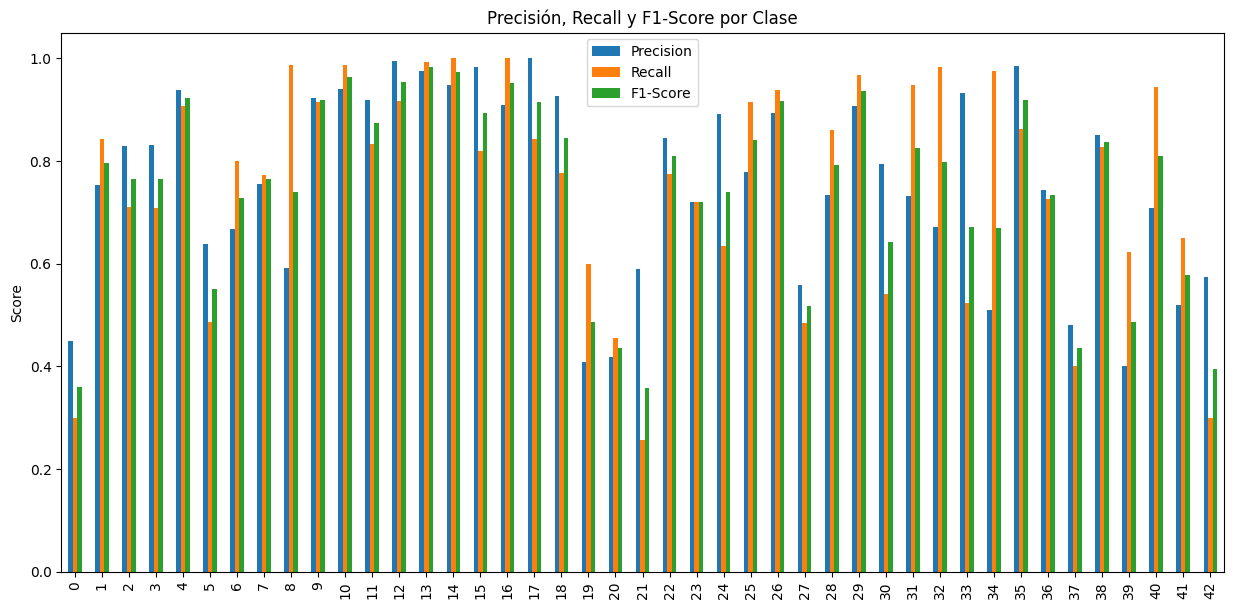

395/395 [==============================] - 1s 3ms/step


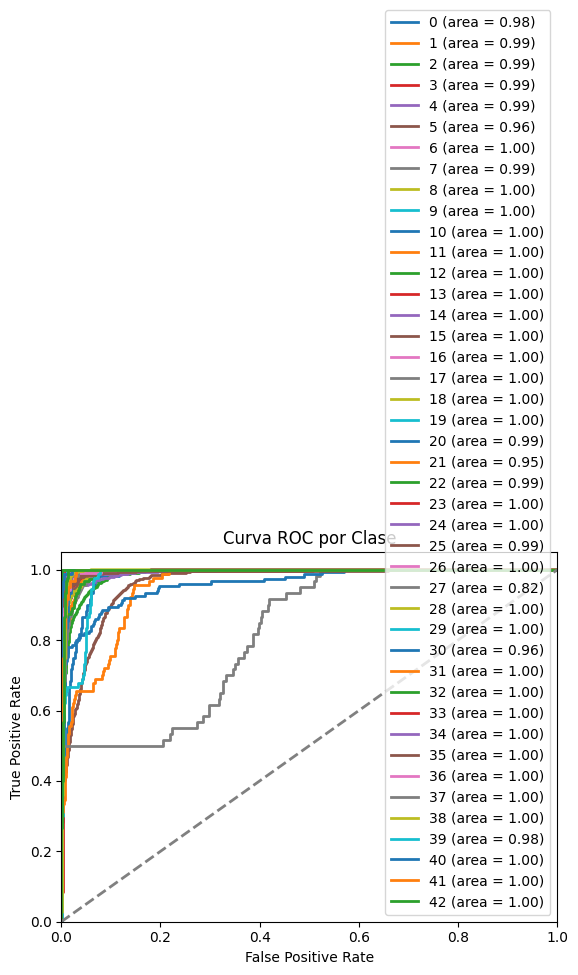

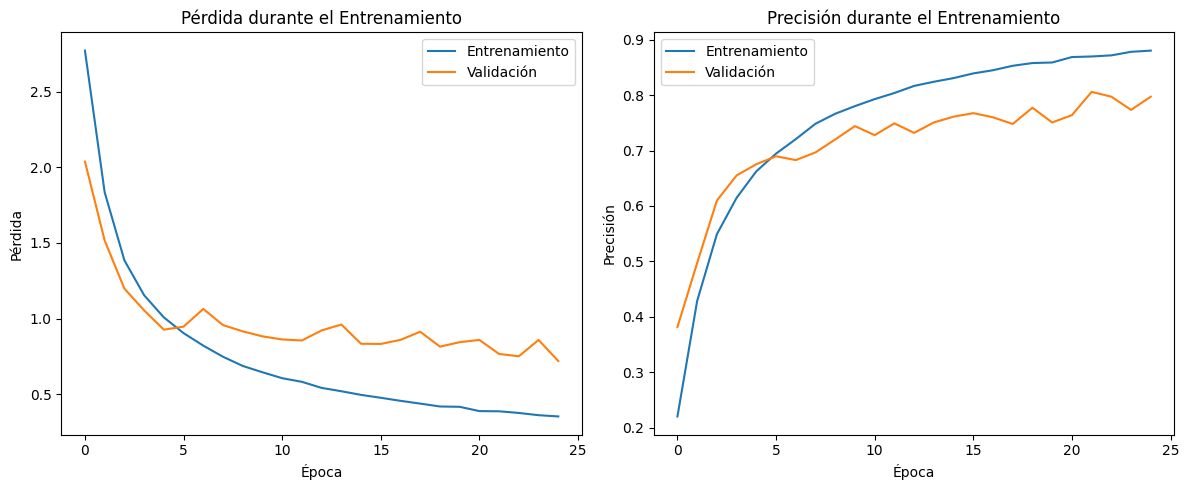

In [20]:
import numpy as np
from sklearn.metrics import classification_report, roc_curve, auc
from tensorflow.keras.utils import to_categorical
import pandas as pd

# 1. Gráfico de barras para Precisión, Recall y F1-Score por clase
report = classification_report(y_testing, y_pred, output_dict=True)
class_names = list(report.keys())[:-3]  # Excluye 'micro avg', 'macro avg' y 'weighted avg'

metrics_data = {'Precision': [], 'Recall': [], 'F1-Score': []}
for metric in metrics_data.keys():
    for class_name in class_names:
        metrics_data[metric].append(report[class_name][metric.lower()])

df_metrics = pd.DataFrame(metrics_data, index=class_names)

df_metrics.plot(kind='bar', figsize=(15, 7))
plt.ylabel('Score')
plt.title('Precisión, Recall y F1-Score por Clase')
plt.show()

# 2. Curva ROC y AUC para cada clase
y_test_cat = to_categorical(y_testing)
y_pred_prob = lenet.predict(X_testing)  # Asegurarse de que estas son las probabilidades

for idx, class_name in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_test_cat[:, idx], y_pred_prob[:, idx])
    roc_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr, lw=2, label=f'{class_name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC por Clase')
plt.legend(loc="lower right")
plt.show()

# 3. Historial de pérdida y precisión durante el entrenamiento
plt.figure(figsize=(12, 5))

# Gráfico de pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()

# Gráfico de precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el Entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()

plt.tight_layout()
plt.show()


# Reflexión:

<br/>
Durante el transcurso del entrenamiento del modelo, se puede claramente apreciar que las pérdidas estandarizadas se mantuvieron consistentes a lo largo de todo el proceso, al igual que la precisión en la evaluación de los resultados obtenidos. Esta tendencia es discernible al examinar las representaciones gráficas más recientes, donde se puede inferir de manera concluyente que el modelo ha alcanzado un nivel de desempeño aceptable.
<br/><br/>
Es relevante señalar que al analizar el puntaje F1, una métrica que combina tanto la precisión como la exhaustividad del modelo, se revela que este indicador se mantuvo constantemente dentro de un rango considerado aceptable. Este comportamiento resalta la habilidad del modelo para equilibrar la correcta clasificación de casos positivos con la capacidad de capturar la totalidad de casos positivos presentes (exhaustividad). En consecuencia, esto refuerza la idea de que el modelo desarrollado es adecuado para abordar tareas relacionadas con el análisis de imágenes y su correspondiente identificación.
<br/><br/>
Los resultados obtenidos a lo largo del proceso de entrenamiento y evaluación indican que el modelo posee una consistencia en términos de pérdidas y precisión. La representación gráfica de estas métricas respalda la noción de que el modelo ha alcanzado un nivel satisfactorio de rendimiento. 